_____________________
<h3><b>4. Simple decision tree</b></h3>

___________________

In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import tensorflow as tf #tf version is 1.12
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [2]:
#import data
with np.load('features_mobilenet_v2.npz', allow_pickle=False) as npz_file:
    #features
    X_train = npz_file['train_hl']
    X_val = npz_file['validation_hl']
    X_test = npz_file['test_hl']
    #labels
    y_train = npz_file['labels_train']
    y_val = npz_file['labels_validation']
    y_test = npz_file['labels_test']

In [3]:
#here I convert the data ad pd.DataFrame to ease the manipulation and visualization with graphviz
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

________________
><h5><b>4.1. Fit and tune the model</b></h5>

_____________

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit decision tree
tree.fit(X_train, y_train)

# Get score
accuracy_tree_test_d3 = tree.score(X_test, y_test)
print('accuracy test tree (depth: 3) = {:.2f}%'.format(accuracy_tree_test_d3))

accuracy test tree (depth: 3) = 0.68%


In [5]:
from sklearn.tree import export_graphviz
import graphviz

# Export decision tree
tree_graph = export_graphviz(
    tree, out_file=None,
    feature_names=X_test.columns, class_names=['bike', 'car', 'motorcycle', 'other', 'truck', 'van'],
    filled=True, rounded=True, proportion=True)

In [6]:
#the graph is visualized in a new window as pdf (the graph is too large to be clearly visualized in jupyter)
graph = graphviz.Source(tree_graph) 
graph.render(view=True)

'Source.gv.pdf'

_____________________
><h5><b>4.2. Dimensionality reduction (PCA)</b></h5>

___________________

In [7]:
# fits PCA, transforms data and fits the decision tree classifier
pipe = Pipeline([('pca', PCA(n_components=2)),#I decided to use only 2 components (those which explain more variance)
                 ('tree', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0))])

#fit
pipe.fit(X_train, y_train)

#get score
accuracy_tree_test_pca = pipe.score(X_test, y_test)
print('accuracy test tree (PCA, n_components=2) = {:.2f}%'.format(accuracy_tree_test_pca))

accuracy test tree (PCA, n_components=2) = 0.84%


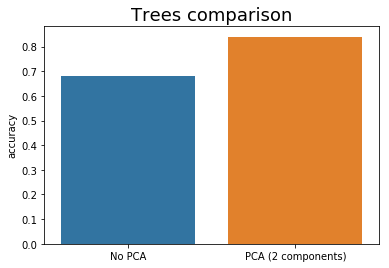

In [8]:
#plot accuracies comparison (with and without PCA)
plot_acc_tree = {'accuracy': [accuracy_tree_test_d3, accuracy_tree_test_pca],
                  'tree': ['No PCA','PCA (2 components)']}
plot_acc_tree = pd.DataFrame(plot_acc_tree)

#plot
sns.barplot(x='tree', y='accuracy',data=plot_acc_tree).set(xlabel=None)
plt.title("Trees comparison", size=18);

The accuracy improves when only the 2 most relevant features are retained compared to the whole dataset.

In [9]:
#append accuracy to models_summary.csv
models_summary = {'model': ['decision tree'],
                  'test_accuracy': [accuracy_tree_test_pca]}
models_summary = pd.DataFrame(models_summary)

models_summary.to_csv("models_summary.csv", mode='a', index=False, header=False)#append to models_summary